<a href="https://colab.research.google.com/github/joaomerjam/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab%203/Lab%203%20World%20Bank%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['BRA', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [36]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Brazil for specific calculations
df_bra = df.xs('BRA', axis=1, level=0).copy()

Fetching data...


In [37]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_bra['Natural_Rate_Unemp'] = df_bra['Unemployment_Rate'].rolling(window=5).mean() # take average of every 5 years and add that number

# 2. Productivity (Output per Worker)
df_bra['Productivity'] = df_bra['GDP_Const'] / df_bra['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_bra['NCO'] = df_bra['Exports_GDP'] - df_bra['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_bra['Budget_Balance'] = df_bra['Tax_Rev_GDP'] - df_bra['Gov_Exp_GDP']

In [38]:
df_bra.head(10)

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
Year,,,,,,,,,,,,,,,,
2000,7.044141,NaN,18.767846,10.188048,18.903119,12.451713,1.186419e+12,6817.783456,16.639454,65.807,80295093.0,10.889,NaN,14775.734354,-2.263665,NaN
2001,6.840359,NaN,19.343295,12.371711,18.741860,14.564574,1.202909e+12,6823.033185,16.548997,66.035,82303564.0,10.649,NaN,14615.514811,-2.192864,NaN
2002,8.450164,NaN,19.809662,14.230590,17.449079,13.387767,1.239639e+12,6944.622576,18.291903,66.975,85201661.0,10.641,NaN,14549.473688,0.842823,NaN
2003,14.714920,NaN,19.077478,15.180784,16.856688,12.959601,1.253781e+12,6941.439659,19.077871,66.899,86794128.0,11.168,NaN,14445.464442,2.221183,NaN
2004,6.597185,NaN,18.467584,16.545762,17.912568,13.132491,1.325999e+12,7258.781017,21.325839,67.364,89058034.0,10.072,10.6838,14889.154865,3.413271,NaN
2005,6.869537,NaN,18.890001,15.243829,17.204883,11.842966,1.368459e+12,7409.568280,20.605747,68.050,91599988.0,10.551,10.6162,14939.511726,3.400863,NaN
2006,4.183568,NaN,19.038917,14.374316,17.816474,11.667384,1.422677e+12,7622.039194,20.523407,67.705,92726865.0,9.692,10.4248,15342.665685,2.706933,NaN
2007,3.641273,NaN,18.942988,13.327675,19.819326,11.964936,1.509032e+12,8003.253210,21.182065,67.295,93712199.0,9.280,10.1526,16102.833744,1.362739,NaN
2008,5.678594,NaN,18.839393,13.534001,21.619383,13.723569,1.585905e+12,8330.763640,21.429814,67.173,95054971.0,8.268,9.5726,16684.082706,-0.189568,NaN


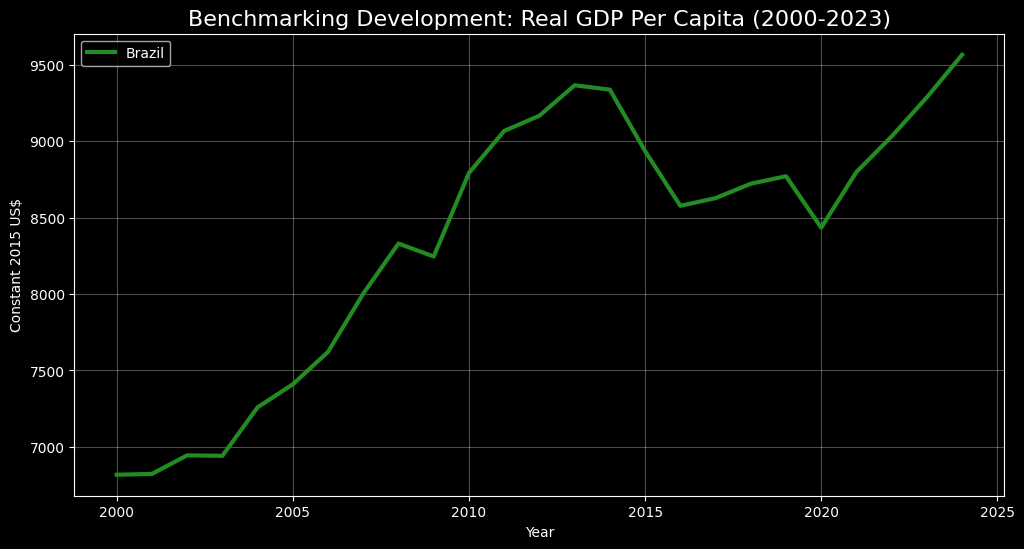

In [39]:
plt.figure(figsize=(12, 6))
# Plot Brazil
plt.plot(df.index, df[('BRA', 'GDP_Per_Capita_Const')], label='Brazil', color='forestgreen', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

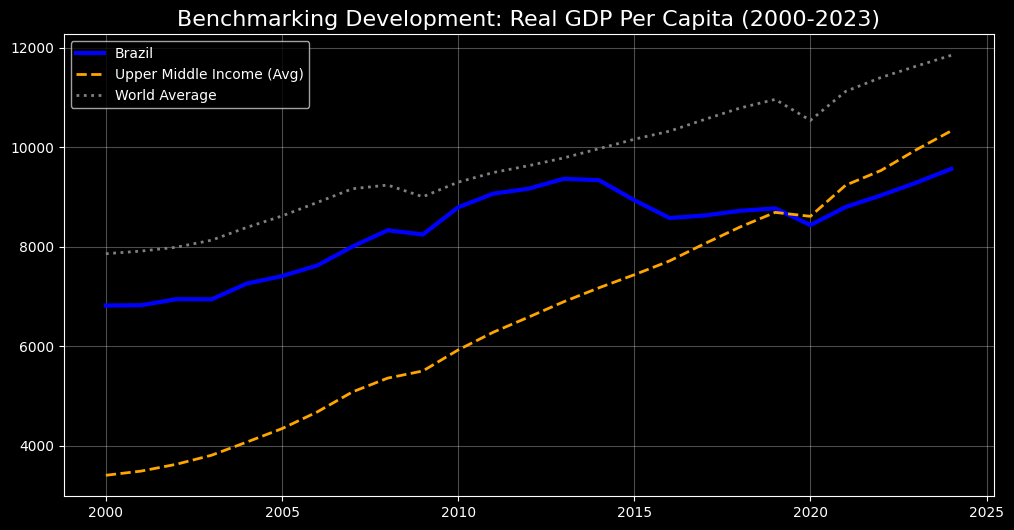

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('BRA', 'GDP_Per_Capita_Const')], label='Brazil', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

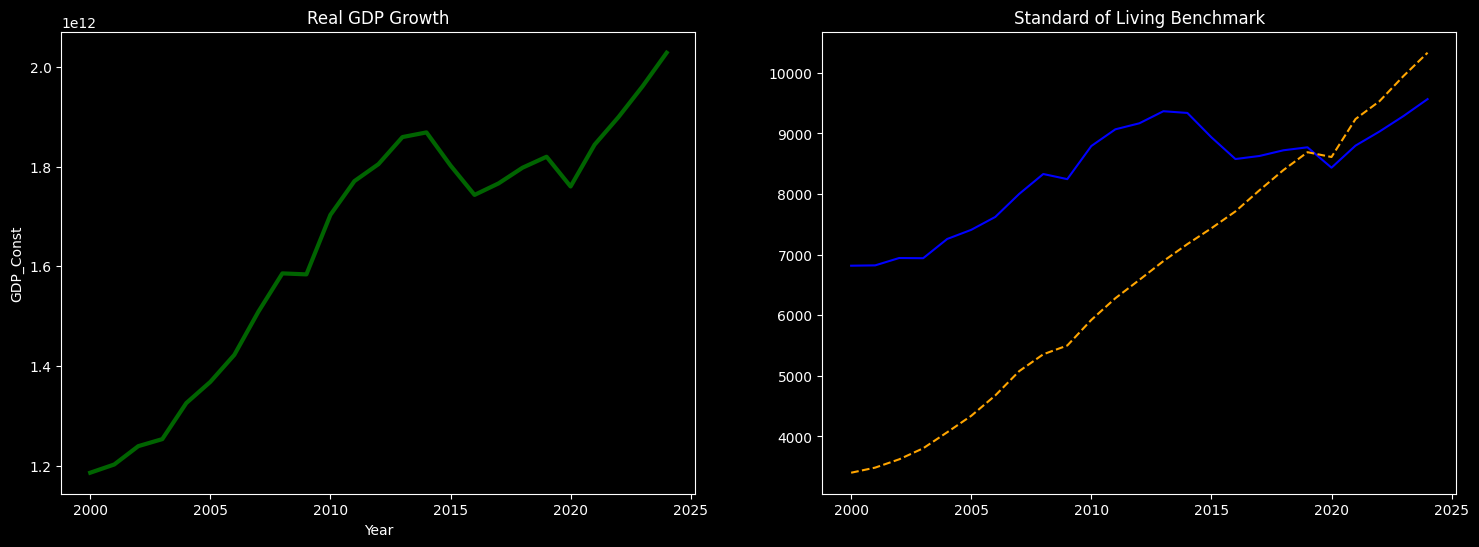

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_bra, x=df_bra.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('BRA', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

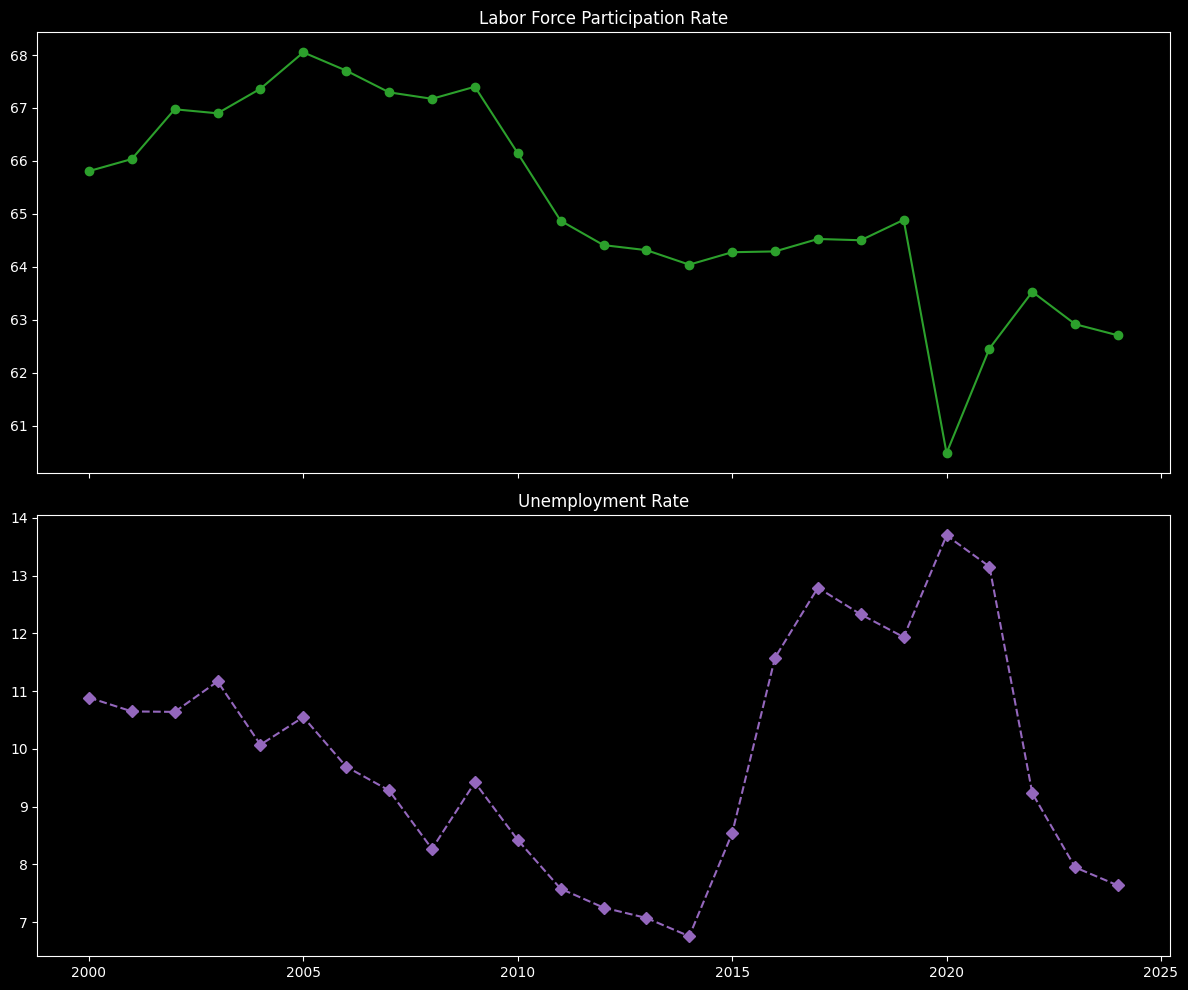

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_bra.index, df_bra['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_bra.index, df_bra['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

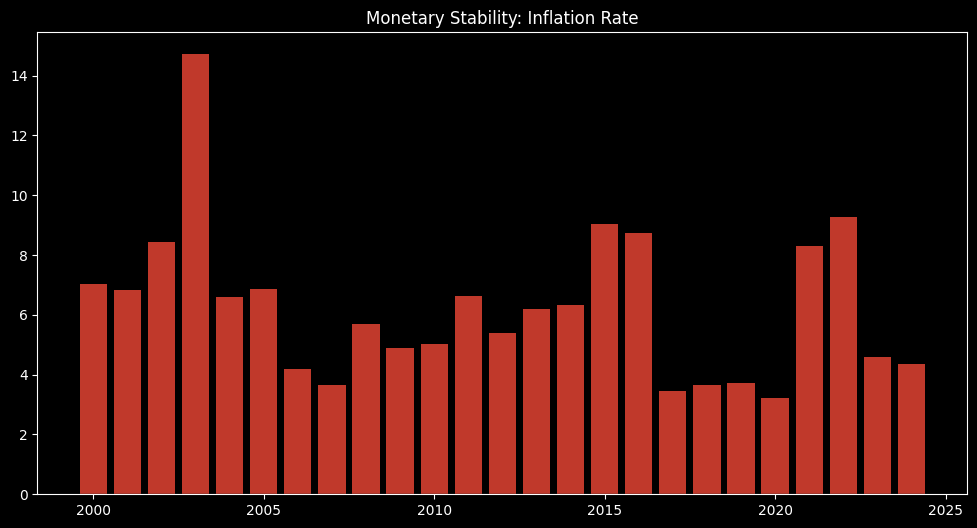

In [43]:
plt.figure(figsize=(12, 6))

plt.bar(df_bra.index, df_bra['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

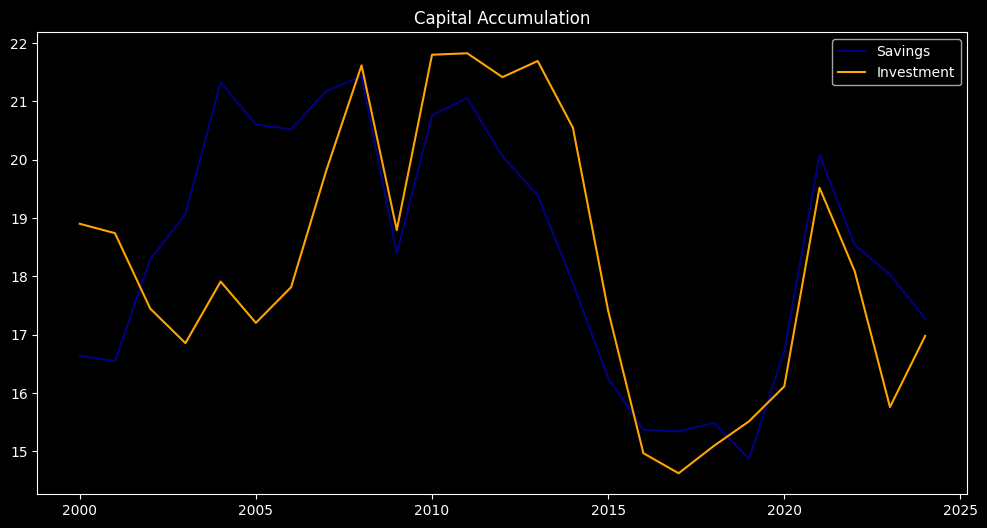

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df_bra.index, df_bra['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_bra.index, df_bra['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

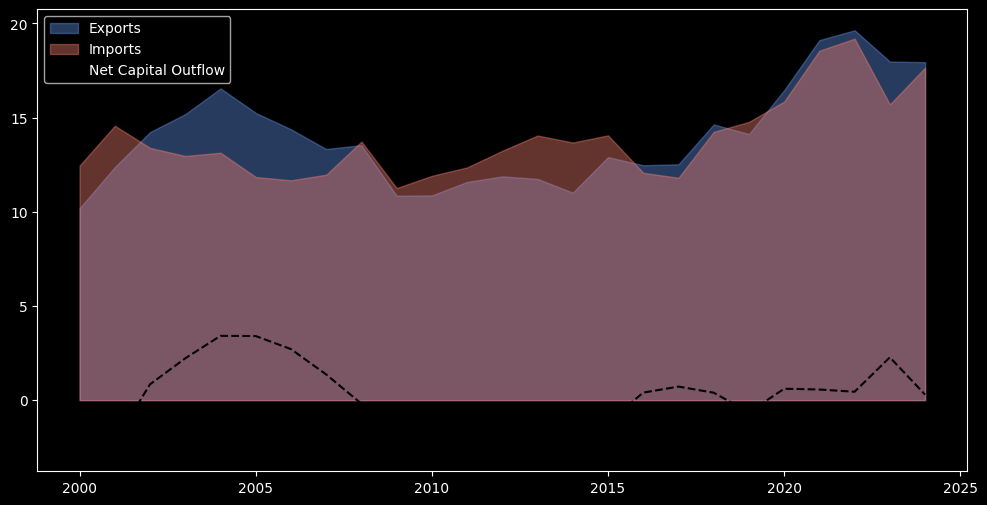

In [45]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_bra.index, df_bra['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_bra.index, df_bra['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_bra.index, df_bra['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

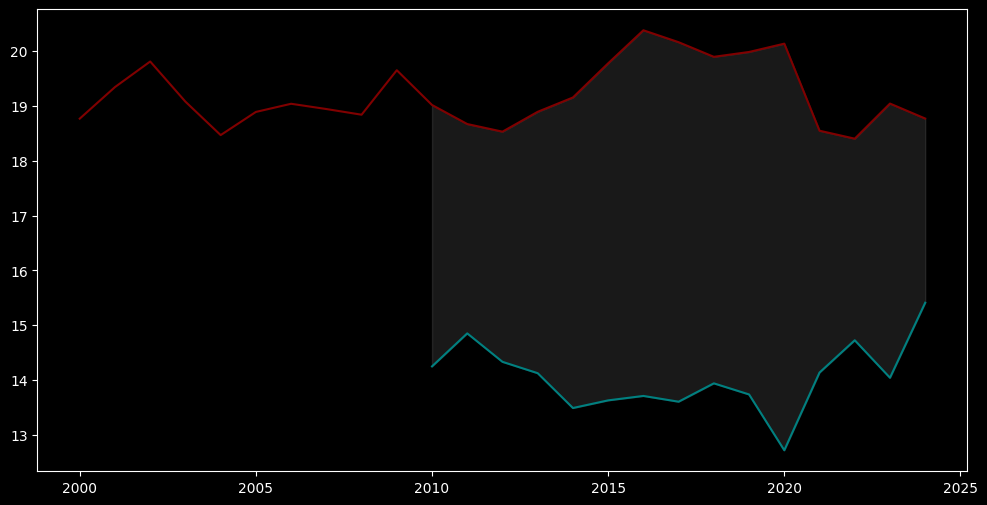

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df_bra.index, df_bra['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_bra.index, df_bra['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_bra.index, df_bra['Tax_Rev_GDP'], df_bra['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

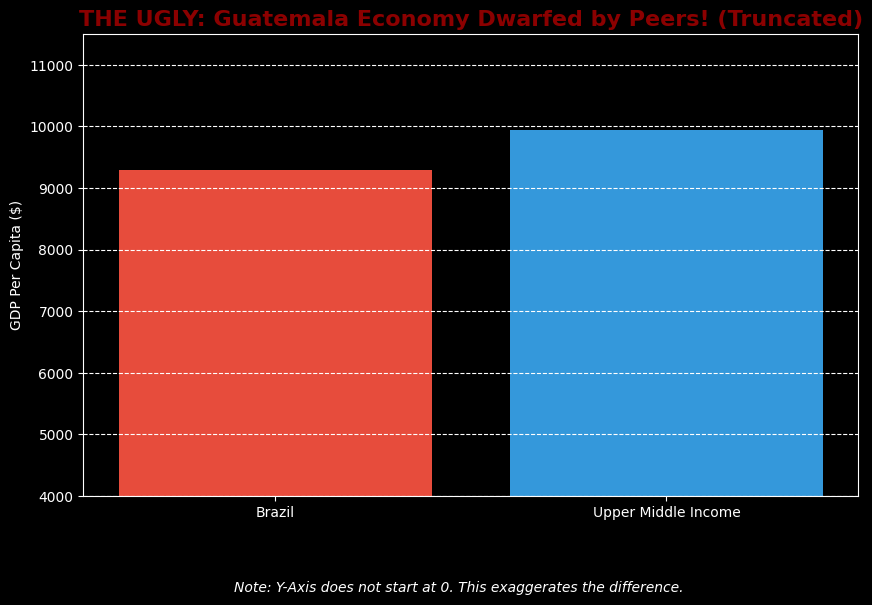

In [47]:
# THE UGLY CHART Check it out
# Setup snapshot data for the latest available year
snapshot_year = 2023
bra_val = df.loc[snapshot_year, ('BRA', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [bra_val, umc_val]
labels = ['Brazil', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

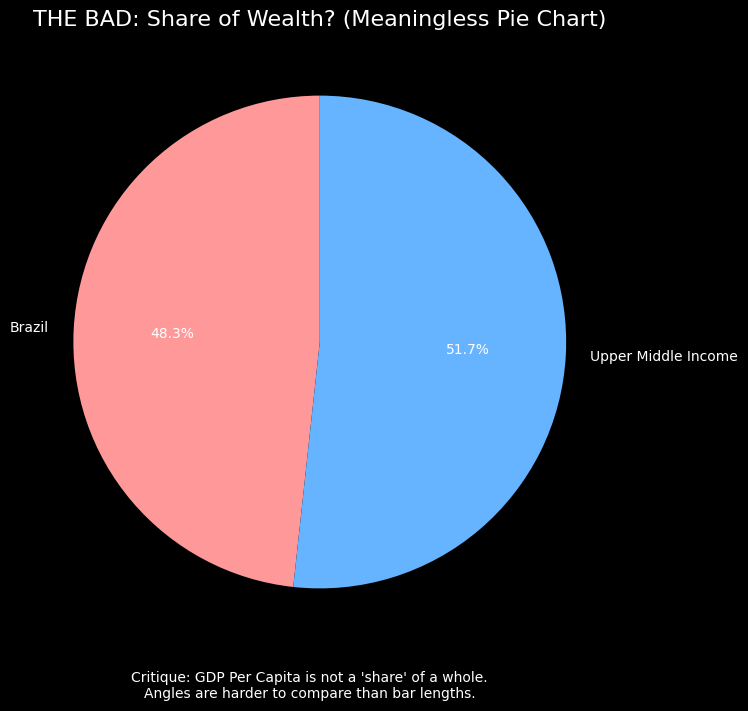

In [48]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

Claude creation to combine all the charts. Prompt:"I have a DataFrame 'df_bra' containing economic indicators for Brazil.
I need to create a **2x3 Executive Dashboard** summarizing the economy using Matplotlib/Seaborn.

**The Variables:**
* Real GDP: 'GDP_Const'
* Inflation: 'Inflation_CPI'
* Unemployment: 'Unemployment_Rate'
* Tax Revenue: 'Tax_Rev_GDP'
* Gov Expenditure: 'Gov_Exp_GDP'
* Exports: 'Exports_GDP'
* Imports: 'Imports_GDP'
* Savings: 'Gross_Dom_Savings'
* Investment: 'Gross_Cap_Formation'

**Requirements:**
1. Top Left: Real GDP (Line chart).
2. Top Middle: Inflation Rate (Bar chart with a horizontal line at 0).
3. Top Right: Unemployment Rate (Line chart).
4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure).
5. Bottom Middle: Trade Balance (Fill area between Exports and Imports).
6. Bottom Right: Savings vs Investment (Dual lines).

**Style:** * Use plt.style.use('dark_background').
* Add a main title: 'Guatemala Economic Snapshot'.
* Use tight_layout() to prevent overlap."
|

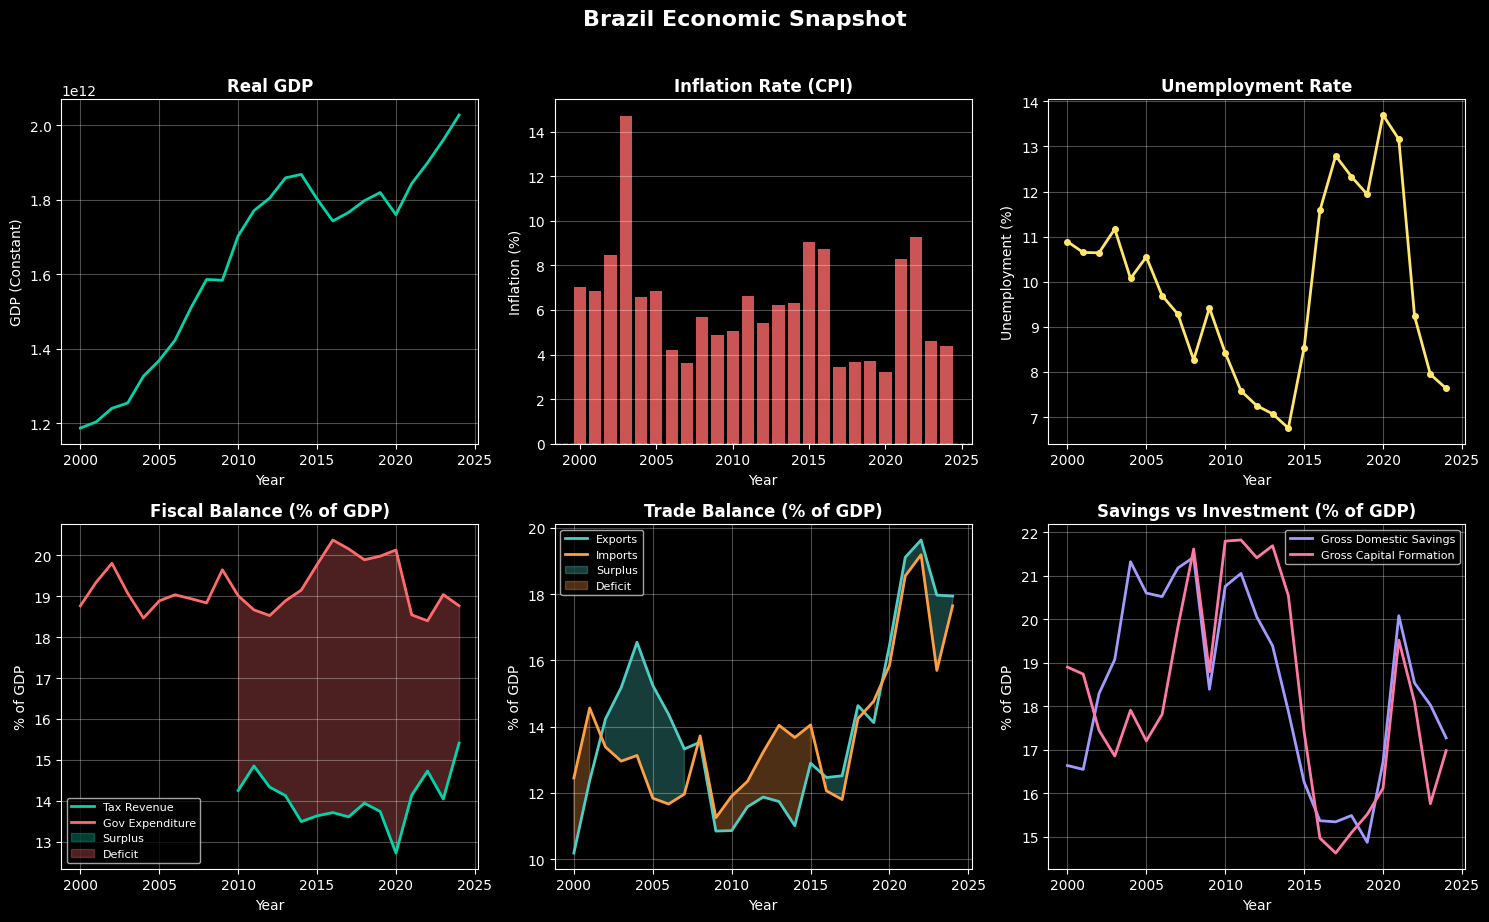

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Top Left: Real GDP (Line chart)
ax1 = axes[0, 0]
ax1.plot(df_bra.index, df_bra['GDP_Const'], color='#00D4AA', linewidth=2)
ax1.set_title('Real GDP', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Constant)')
ax1.grid(alpha=0.3)

# Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
ax2 = axes[0, 1]
colors = ['#FF6B6B' if x > 0 else '#4ECDC4' for x in df_bra['Inflation_CPI']]
ax2.bar(df_bra.index, df_bra['Inflation_CPI'], color=colors, alpha=0.8)
ax2.axhline(y=0, color='white', linestyle='--', linewidth=1)
ax2.set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation (%)')
ax2.grid(alpha=0.3, axis='y')

# Top Right: Unemployment Rate (Line chart)
ax3 = axes[0, 2]
ax3.plot(df_bra.index, df_bra['Unemployment_Rate'], color='#FFE66D', linewidth=2, marker='o', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax3.grid(alpha=0.3)

# Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
ax4 = axes[1, 0]
ax4.plot(df_bra.index, df_bra['Tax_Rev_GDP'], label='Tax Revenue', color='#00D4AA', linewidth=2)
ax4.plot(df_bra.index, df_bra['Gov_Exp_GDP'], label='Gov Expenditure', color='#FF6B6B', linewidth=2)
ax4.fill_between(df_bra.index, df_bra['Tax_Rev_GDP'], df_bra['Gov_Exp_GDP'],
                  where=(df_bra['Tax_Rev_GDP'] >= df_bra['Gov_Exp_GDP']), color='#00D4AA', alpha=0.3, label='Surplus')
ax4.fill_between(df_bra.index, df_bra['Tax_Rev_GDP'], df_bra['Gov_Exp_GDP'],
                  where=(df_bra['Tax_Rev_GDP'] < df_bra['Gov_Exp_GDP']), color='#FF6B6B', alpha=0.3, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('% of GDP')
ax4.legend(loc='best', fontsize=8)
ax4.grid(alpha=0.3)

# Bottom Middle: Trade Balance (Fill area between Exports and Imports)
ax5 = axes[1, 1]
ax5.plot(df_bra.index, df_bra['Exports_GDP'], label='Exports', color='#4ECDC4', linewidth=2)
ax5.plot(df_bra.index, df_bra['Imports_GDP'], label='Imports', color='#FF9F43', linewidth=2)
ax5.fill_between(df_bra.index, df_bra['Exports_GDP'], df_bra['Imports_GDP'],
                  where=(df_bra['Exports_GDP'] >= df_bra['Imports_GDP']), color='#4ECDC4', alpha=0.3, label='Surplus')
ax5.fill_between(df_bra.index, df_bra['Exports_GDP'], df_bra['Imports_GDP'],
                  where=(df_bra['Exports_GDP'] < df_bra['Imports_GDP']), color='#FF9F43', alpha=0.3, label='Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('% of GDP')
ax5.legend(loc='best', fontsize=8)
ax5.grid(alpha=0.3)

# Bottom Right: Savings vs Investment (Dual lines)
ax6 = axes[1, 2]
ax6.plot(df_bra.index, df_bra['Gross_Dom_Savings'], label='Gross Domestic Savings', color='#A29BFE', linewidth=2)
ax6.plot(df_bra.index, df_bra['Gross_Cap_Formation'], label='Gross Capital Formation', color='#FD79A8', linewidth=2)
ax6.set_title('Savings vs Investment (% of GDP)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('% of GDP')
ax6.legend(loc='best', fontsize=8)
ax6.grid(alpha=0.3)

# Main title
fig.suptitle('Brazil Economic Snapshot', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

In [52]:
df_bra.describe()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
count,25.000000,15.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,2.500000e+01,25.000000,21.000000,25.000000,25.000000,15.000000
mean,6.275504,14.047051,19.207356,14.026932,18.259725,13.840614,1.644273e+12,8355.509677,18.446043,65.161640,9.680832e+07,9.861920,9.893238,16892.690630,0.186319,-5.243355
std,2.559893,0.641721,0.591731,2.683549,2.303633,2.143823,2.569189e+11,880.064729,2.136333,1.934601,7.705599e+06,2.014923,1.587169,1540.332519,1.731068,1.233937
min,3.211768,12.719388,18.402213,10.188048,14.625588,11.254604,1.186419e+12,6817.783456,14.872371,60.479000,8.029509e+07,6.755000,7.415400,14445.464442,-2.661520,-7.415765
25%,4.367464,13.670030,18.769603,11.877539,16.856688,12.067003,1.422677e+12,7622.039194,16.639454,64.275000,9.272686e+07,8.268000,8.593400,15342.665685,-1.041009,-6.196539
50%,6.204311,14.041862,19.038917,13.534001,17.912568,13.387767,1.760056e+12,8628.252096,18.392902,64.870000,9.685715e+07,9.692000,10.152600,17124.386442,0.393796,-5.000748
75%,7.044141,14.290994,19.776820,15.243829,19.819326,14.564574,1.819683e+12,9032.083777,20.523407,66.975000,1.034761e+08,11.168000,10.683800,17916.830664,0.842823,-4.304303
max,14.714920,15.410234,20.379297,19.630765,21.826271,19.185301,2.028136e+12,9566.744086,21.429814,68.050000,1.067904e+08,13.697000,12.782400,18991.744928,3.413271,-3.359369


In [53]:
df_bra.mean()

,0
series,
Inflation_CPI,6.275504e+00
Tax_Rev_GDP,1.404705e+01
Gov_Exp_GDP,1.920736e+01
Exports_GDP,1.402693e+01
Gross_Cap_Formation,1.825972e+01
Imports_GDP,1.384061e+01
GDP_Const,1.644273e+12
GDP_Per_Capita_Const,8.355510e+03
Gross_Dom_Savings,1.844604e+01


In [54]:
pd.options.display.float_format = '{:.2f}'.format
df_bra.describe()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
count,25.00,15.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,21.00,25.00,25.00,15.00
mean,6.28,14.05,19.21,14.03,18.26,13.84,1644273472897.99,8355.51,18.45,65.16,96808322.44,9.86,9.89,16892.69,0.19,-5.24
std,2.56,0.64,0.59,2.68,2.30,2.14,256918920992.16,880.06,2.14,1.93,7705599.07,2.01,1.59,1540.33,1.73,1.23
min,3.21,12.72,18.40,10.19,14.63,11.25,1186418964121.03,6817.78,14.87,60.48,80295093.00,6.75,7.42,14445.46,-2.66,-7.42
25%,4.37,13.67,18.77,11.88,16.86,12.07,1422677289673.84,7622.04,16.64,64.28,92726865.00,8.27,8.59,15342.67,-1.04,-6.20
50%,6.20,14.04,19.04,13.53,17.91,13.39,1760056385298.89,8628.25,18.39,64.87,96857149.00,9.69,10.15,17124.39,0.39,-5.00
75%,7.04,14.29,19.78,15.24,19.82,14.56,1819683008336.22,9032.08,20.52,66.97,103476109.00,11.17,10.68,17916.83,0.84,-4.30
max,14.71,15.41,20.38,19.63,21.83,19.19,2028136094548.34,9566.74,21.43,68.05,106790403.00,13.70,12.78,18991.74,3.41,-3.36


In [58]:
df_bra.median()

,0
series,
Inflation_CPI,6.20
Tax_Rev_GDP,14.04
Gov_Exp_GDP,19.04
Exports_GDP,13.53
Gross_Cap_Formation,17.91
Imports_GDP,13.39
GDP_Const,1760056385298.89
GDP_Per_Capita_Const,8628.25
Gross_Dom_Savings,18.39
